# Task 1

In [2]:
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
docs_dir = 'docs'
documents = []
filenames = []

for filename in os.listdir(docs_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(docs_dir, filename), 'r', encoding='utf-8') as file:
            documents.append(file.read())
            filenames.append(filename)


print(f"Found {len(documents)} documents: {filenames}")

Found 3 documents: ['Climate Change and Sustainability.txt', 'Global Health and Pandemics.txt', 'Technology and Innovation.txt']


In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix.shape

(3, 315)

In [19]:
pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=filenames).head()

,19,access,act,action,activists,adapting,addressed,adopting,adoption,advances,...,visits,warming,waste,water,weather,wellness,wind,witnessing,work,years
Climate Change and Sustainability.txt,0.000000,0.000000,0.059662,0.078448,0.078448,0.078448,0.000000,0.078448,0.078448,0.000000,...,0.000000,0.078448,0.156896,0.078448,0.078448,0.000000,0.078448,0.000000,0.000000,0.000000
Global Health and Pandemics.txt,0.157513,0.119793,0.059896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.078757,0.000000,0.000000,0.000000,0.059896
Technology and Innovation.txt,0.000000,0.066644,0.000000,0.000000,0.000000,0.000000,0.087629,0.000000,0.000000,0.000000,...,0.087629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087629,0.087629,0.066644



Top 10 terms for Climate Change and Sustainability.txt:
  climate: 0.2353
  sustainability: 0.2353
  energy: 0.1790
  sustainable: 0.1569
  carbon: 0.1569
  change: 0.1569
  waste: 0.1569
  planet: 0.1569
  green: 0.1569
  environmental: 0.1569

Top 10 terms for Global Health and Pandemics.txt:
  health: 0.3938
  vaccines: 0.1575
  19: 0.1575
  covid: 0.1575
  mental: 0.1575
  treatment: 0.1575
  promoting: 0.1575
  international: 0.1575
  early: 0.1575
  like: 0.1395

Top 10 terms for Technology and Innovation.txt:
  technology: 0.2666
  data: 0.2629
  transformation: 0.1753
  learning: 0.1753
  digital: 0.1333
  ai: 0.1035
  care: 0.0876
  things: 0.0876
  thoughtful: 0.0876
  traffic: 0.0876


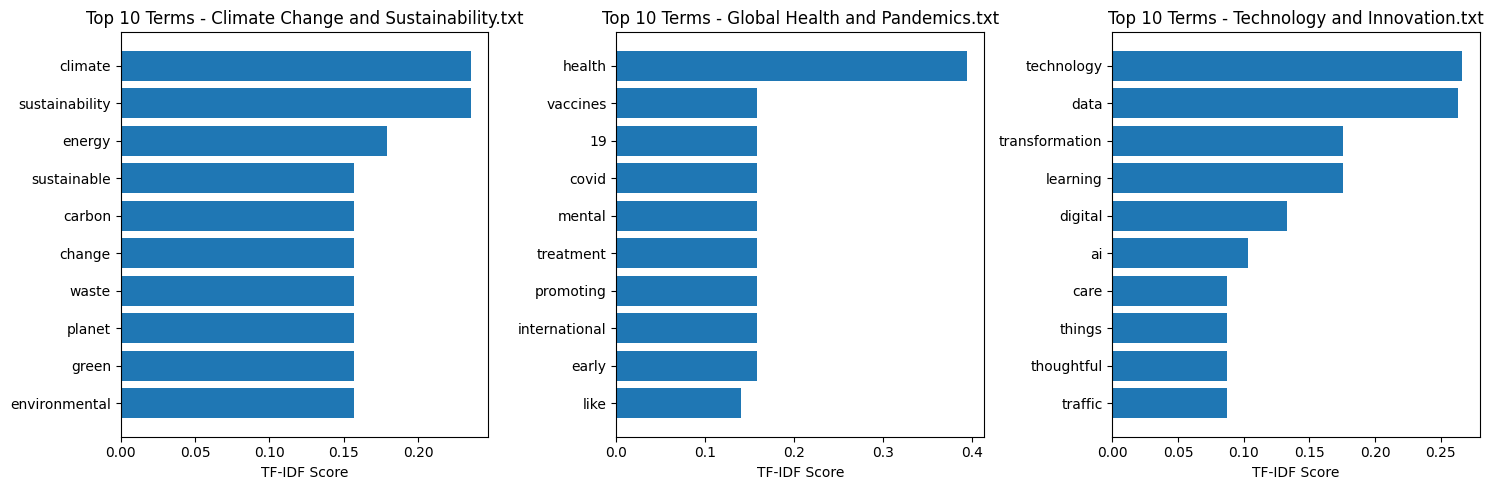

In [12]:
fig, axes = plt.subplots(1, len(documents), figsize=(15, 5))


for i, (doc, filename) in enumerate(zip(documents, filenames)):
    doc_tfidf = tfidf_matrix[i].toarray().flatten()
    
    top_indices = doc_tfidf.argsort()[-10:][::-1]
    top_terms = [feature_names[idx] for idx in top_indices]
    top_scores = [doc_tfidf[idx] for idx in top_indices]
    
    print(f"\nTop 10 terms for {filename}:")
    for term, score in zip(top_terms, top_scores):
        print(f"  {term}: {score:.4f}")
    
    axes[i].barh(range(len(top_terms)), top_scores)
    axes[i].set_yticks(range(len(top_terms)))
    axes[i].set_yticklabels(top_terms)
    axes[i].set_xlabel('TF-IDF Score')
    axes[i].set_title(f'Top 10 Terms - {filename}')
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

Climate Change and Sustainability emphasizes environmental terms like "climate," "sustainability," and "carbon,"

Global Health and Pandemics centers on health-related vocabulary including "health," "vaccines," and "COVID-19." 

Technology and Innovation highlights digital transformation concepts with "technology," "data," and "digital" 

# Task 2

In [11]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [15]:
for i, (doc_text, filename) in enumerate(zip(documents, filenames)):
    print(f"Named Entity Recognition for: {filename}")
    
    doc_nlp = nlp(doc_text)
    
    entities_by_type = {}
    
    for ent in doc_nlp.ents:
        if ent.label_ not in entities_by_type:
            entities_by_type[ent.label_] = []
        entities_by_type[ent.label_].append(ent.text)
    
    for ent_type in sorted(entities_by_type.keys()):
        entities = entities_by_type[ent_type]
        entity_counts = {}
        for entity in entities:
            entity_counts[entity] = entity_counts.get(entity, 0) + 1
        
        print(f"\n{ent_type} ({len(entities)} total):")
        for entity, count in sorted(entity_counts.items(), key=lambda x: x[1], reverse=True):
            print(f"  {entity}: {count}")

Named Entity Recognition for: Climate Change and Sustainability.txt

CARDINAL (1 total):
  one: 1

GPE (4 total):
  Denmark: 1
  Germany: 1
  India: 1
  AI: 1

LOC (1 total):
  Earth: 1

ORG (3 total):
  the United Nations: 1
  IPCC: 1
  ESG: 1

PERSON (2 total):
  Greta Thunberg: 1
  Governance: 1
Named Entity Recognition for: Global Health and Pandemics.txt

CARDINAL (1 total):
  millions: 1

DATE (1 total):
  recent years: 1

GPE (1 total):
  AI: 1

NORP (1 total):
  Mental: 1

ORG (5 total):
  COVID-19: 1
  WHO: 1
  CDC: 1
  the Bill & Melinda Gates Foundation: 1
  AI: 1

PERSON (3 total):
  Pfizer: 1
  Moderna: 1
  Beyond COVID-19: 1
Named Entity Recognition for: Technology and Innovation.txt

DATE (1 total):
  recent years: 1

GPE (1 total):
  AI: 1

ORG (4 total):
  Google: 1
  Microsoft: 1
  Amazon: 1
  IoT: 1

PERSON (1 total):
  Coursera: 1


The NER analysis reveals strong performance in identifying organizations (Google, Microsoft, WHO, CDC) and locations (Denmark, Germany, India), but struggles with technical terms like "AI" being misclassified as a geopolitical entity and "Coursera" as a person rather than an organization. The model would benefit from domain-specific training to better handle technology and health terminology.


# Task 3

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
for i, (doc_text, filename) in enumerate(zip(documents, filenames)):

    print(f"\n{filename}")

    bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=100)
    bigram_matrix = bigram_vectorizer.fit_transform([doc_text])
    bigram_features = bigram_vectorizer.get_feature_names_out()
    bigram_counts = bigram_matrix.toarray()[0]
    
    top_bigram_indices = bigram_counts.argsort()[-5:][::-1]
    top_bigrams = [(bigram_features[idx], bigram_counts[idx]) for idx in top_bigram_indices if bigram_counts[idx] > 0]
    
    print("Top 5 Bigrams:")
    for bigram, count in top_bigrams:
        print(f"  '{bigram}': {count}")
    
    trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=100)
    trigram_matrix = trigram_vectorizer.fit_transform([doc_text])
    trigram_features = trigram_vectorizer.get_feature_names_out()
    trigram_counts = trigram_matrix.toarray()[0]
    
    top_trigram_indices = trigram_counts.argsort()[-5:][::-1]
    top_trigrams = [(trigram_features[idx], trigram_counts[idx]) for idx in top_trigram_indices if trigram_counts[idx] > 0]
    
    print("Top 5 Trigrams:")
    for trigram, count in top_trigrams:
        print(f"  '{trigram}': {count}")


Climate Change and Sustainability.txt
Top 5 Bigrams:
  'climate change': 2
  'recycling systems': 1
  'protect planet': 1
  'raised awareness': 1
  'preservation environmental': 1
Top 5 Trigrams:
  'recycling systems simultaneously': 1
  'raised awareness climate': 1
  'protect planet future': 1
  'progress green energy': 1
  'preservation environmental activists': 1

Global Health and Pandemics.txt
Top 5 Bigrams:
  'covid 19': 2
  'reducing stigma': 1
  'recognition campaigns': 1
  'record time': 1
  'public health': 1
Top 5 Trigrams:
  'reducing stigma digital': 1
  'record time covid': 1
  'recognition campaigns promoting': 1
  'recent years particularly': 1
  'public health policies': 1

Technology and Innovation.txt
Top 5 Bigrams:
  'research automation': 1
  'reducing hospital': 1
  'redefine work': 1
  'recent years': 1
  'real time': 1
Top 5 Trigrams:
  'responsible innovation future': 1
  'research automation technologies': 1
  'reducing hospital visits': 1
  'redefine work c

Climate Change emphasizes "climate change" and environmental action phrases

Global Health focuses on "covid 19" and public health initiatives

Technology highlights innovation terms like "real time" data and automation. 

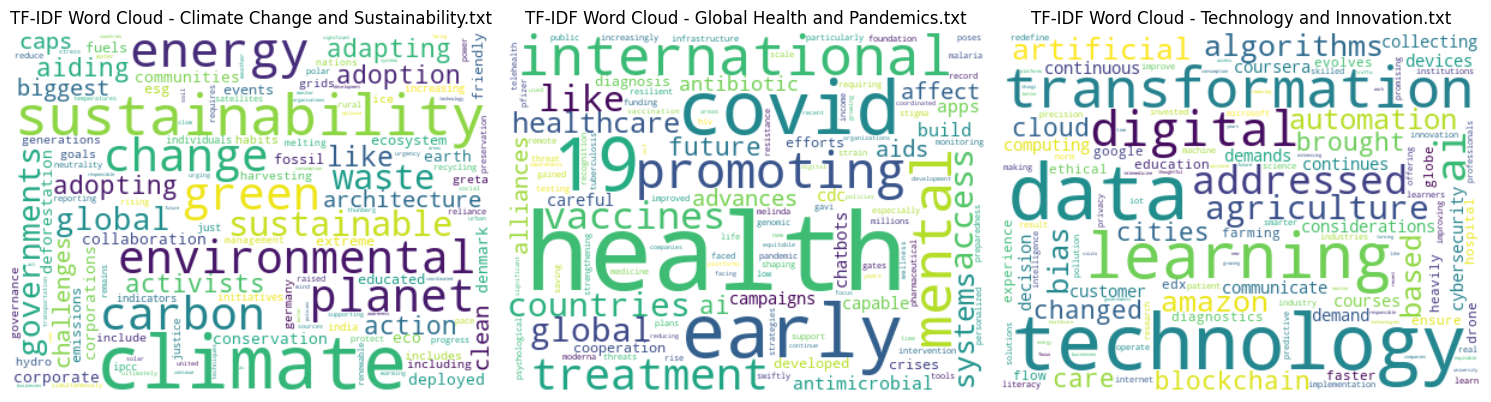

In [ ]:
from wordcloud import WordCloud

fig, axes = plt.subplots(1, len(documents), figsize=(15, 5))

for i, (doc_text, filename) in enumerate(zip(documents, filenames)):
    doc_tfidf = tfidf_matrix[i].toarray().flatten()
    
    tfidf_dict = {}
    for j, score in enumerate(doc_tfidf):
        if score > 0:
            tfidf_dict[feature_names[j]] = score
    
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(tfidf_dict)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'TF-IDF Word Cloud - {filename}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.4f}")

for filename, label in zip(filenames, cluster_labels):
    print(f"{label}: {filename}")

Silhouette Score: 0.0039
0: Climate Change and Sustainability.txt
0: Global Health and Pandemics.txt
1: Technology and Innovation.txt


The K-means clustering algorithm grouped the three documents into 2 clusters with a silhouette score of 0.0039, indicating very poor cluster separation. Climate Change and Global Health documents were grouped together (cluster 0) while Technology was isolated (cluster 1), suggesting the algorithm struggled to find meaningful distinctions between the first two topics despite their different subject matters.